In [80]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import seaborn as sns


In [99]:
inputData = pd.read_excel(r'/Users/sunainarangarajan/Desktop/Volumetric_features.xlsx', engine='openpyxl')
inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [82]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=6)


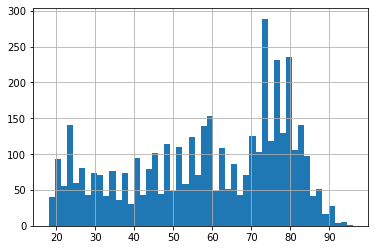

In [102]:
hist = y.hist(bins=50)

In [83]:
from sklearn.linear_model import Ridge

# instantiate a linear regression model 
rid = Ridge(alpha=0.5)

# fit the model to the training data
rid.fit(X_train, y_train)

Ridge(alpha=0.5)

In [93]:
# check the model's performance on unseen, test data
prediction1 = rid.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, prediction1))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, prediction1))
print('mean square error:', metrics.mean_squared_error(y_test, prediction1))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))


r square value: 0.8468934797169567
mean absolute error (years): 6.221697421209967
mean square error: 62.413917658770856
root mean sqaure error (years): 7.900247949195699


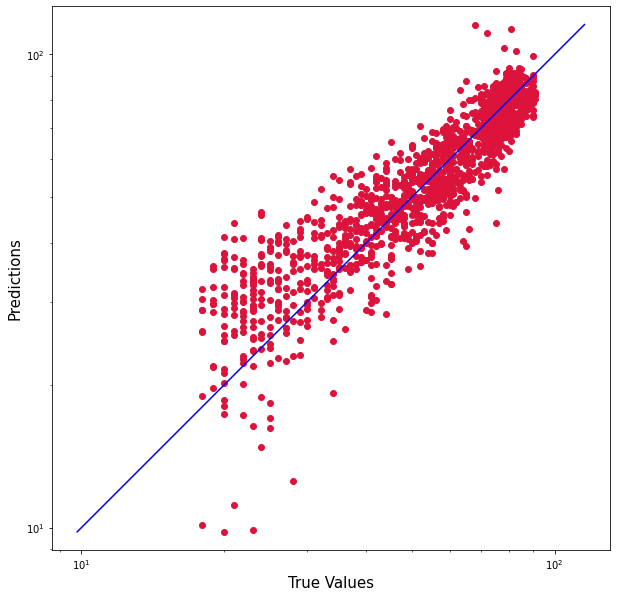

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction1), max(y_test))
p2 = min(min(prediction1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [96]:
from catboost import CatBoostRegressor


# instantiate a linear regression model 
linreg = CatBoostRegressor()

# fit the model to the training data
linreg.fit(X_train, y_train)

# grid = {'iterations': [100, 150, 200],
#         'learning_rate': [0.03, 0.1],
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}
# linreg.grid_search(grid, train_dataset)


Learning rate set to 0.048028
0:	learn: 19.3667880	total: 21.9ms	remaining: 21.8s
1:	learn: 18.7677359	total: 30.1ms	remaining: 15s
2:	learn: 18.1761770	total: 37ms	remaining: 12.3s
3:	learn: 17.6081061	total: 43.5ms	remaining: 10.8s
4:	learn: 17.0518312	total: 49.5ms	remaining: 9.85s
5:	learn: 16.5304190	total: 55.2ms	remaining: 9.14s
6:	learn: 16.0393872	total: 60.8ms	remaining: 8.62s
7:	learn: 15.5758242	total: 66ms	remaining: 8.19s
8:	learn: 15.1284469	total: 71.4ms	remaining: 7.86s
9:	learn: 14.7072692	total: 76.7ms	remaining: 7.6s
10:	learn: 14.3075845	total: 82.2ms	remaining: 7.39s
11:	learn: 13.9446078	total: 88.4ms	remaining: 7.28s
12:	learn: 13.5949539	total: 94ms	remaining: 7.14s
13:	learn: 13.2509201	total: 99.4ms	remaining: 7s
14:	learn: 12.9603428	total: 105ms	remaining: 6.89s
15:	learn: 12.6597424	total: 111ms	remaining: 6.81s
16:	learn: 12.3708090	total: 116ms	remaining: 6.71s
17:	learn: 12.1001971	total: 122ms	remaining: 6.63s
18:	learn: 11.8444755	total: 127ms	remaini

In [97]:
# check the model's performance on unseen, test data
prediction2 = linreg.predict(X_test)


# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, prediction2))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, prediction2))
print('mean square error:', metrics.mean_squared_error(y_test, prediction2))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, prediction2)))

r square value: 0.8883751496409372
mean absolute error (years): 4.944170831715027
mean square error: 45.50390281291477
root mean sqaure error (years): 6.745658071153234


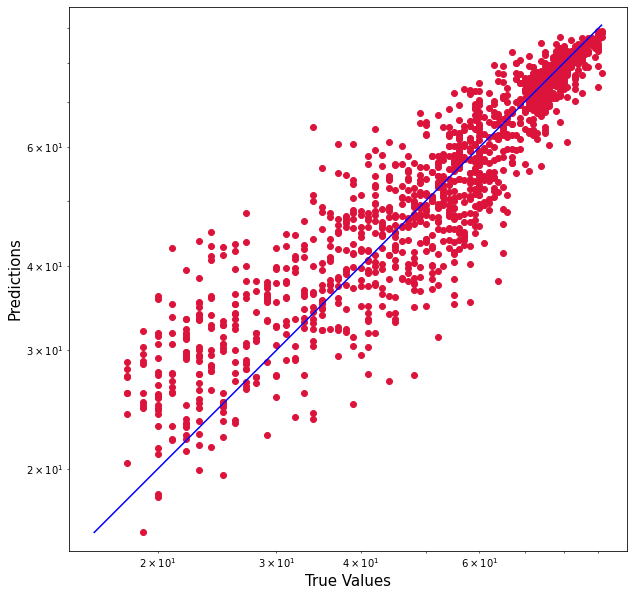

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction2), max(y_test))
p2 = min(min(prediction2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [89]:
from sklearn.linear_model import BayesianRidge

bayrid = BayesianRidge()


# fit the model to the training data
bayrid.fit(X_train, y_train)

BayesianRidge()

In [90]:
# check the model's performance on unseen, test data
prediction3 = bayrid.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean sqaure error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.8468934797169567
mean absolute error (years): 6.221697421209967
mean square error: 62.413917658770856
root mean sqaure error (years): 7.900247949195699


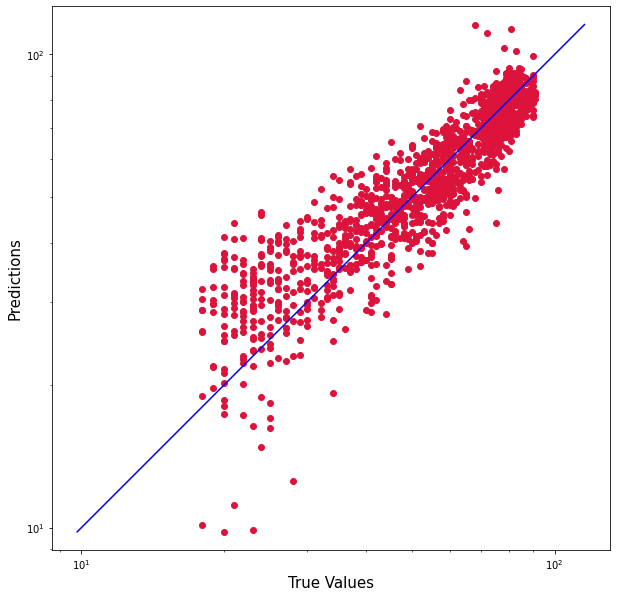

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()